## Problema 4

A equação de movimento de um corpo de massa $m$ orbitando o Sol é:

$$m \frac{d^2\vec{r}}{dt^2} = - \frac{GMm}{r^2}\frac{\vec{r}}{r}$$

(a) Use a equação acima para resolver a órbita da Terra. Assuma que a órbita se dá em um plano, reduzindo o problema a duas dimensões. Escreva um programa que resolva as equações relevantes usando o método de Runge-Kutta de quarta ordem. Procure na literatura valores para as constantes a serem usadas assim como para a posição e velocidade inicial da Terra.

(b) Estude a sua solução do ponto de vista do passo adotado. Qual é o passo que permite resolver o problema? Qual o erro relativo aceitável que foi adotado?

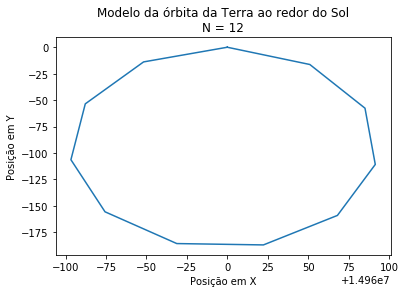

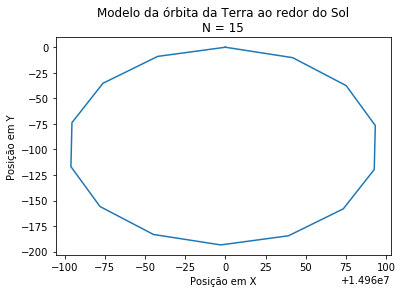

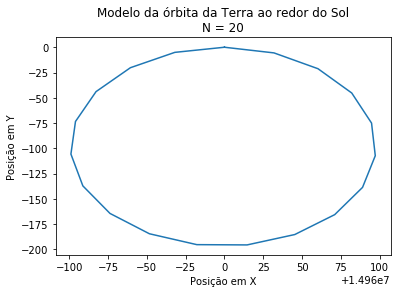

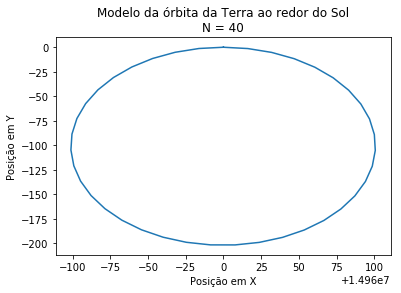

In [4]:
# Importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt

# Definição das variáveis necessárias
MTerra = 5.972e24 # Massa da Terra
constG = 6.67408e-11 # Constante gravitacional
r0 = 149.6e5 # Distância Terra-Sol
N = 0
tN = 365.242199 # Número de dias
w = (2.)*(np.pi)/(float(tN))


# Definição da função de movimento em x
def fx(t,x):
    return (-1.)*(((constG)*(MTerra)*(np.cos(w*t)))/(r0**2))

# Definição da função de movimento em y
def fy(t,x):
    return (-1.)*(((constG)*(MTerra)*(np.sin(w*t)))/(r0**2))

# Definição do método de Runge-Kutta de 4ª ordem
def rk4(f, h, p0, t0):
    k1 = f(t0, p0)
    k2 = f(t0 + h / 2., p0 + h / 2. * k1)
    k3 = f(t0 + h / 2., p0 + h / 2. * k2)
    k4 = f(t0 + h, p0 + h * k3)
    return p0 + h * (k1 + 2. * k2 + 2. * k3 + k4) / 6.

# Função para aplicar o método RK4
def aplicaRK4(f1,f2,N):
    tempo = np.linspace(0 , tN , N)
    x = np.arange(float(N))
    y = np.arange(float(N))
    h = (tN - tempo[0])/N
    x[0] = r0
    y[0] = 0.
    for i in range(N-1):
        x[i+1] = rk4(f1, h, x[i], tempo[i])
        y[i+1] = rk4(f2, h, y[i], tempo[i])
    plt.plot(x,y)
    plt.title('Modelo da órbita da Terra ao redor do Sol\nN = %d' %N)
    plt.xlabel('Posição em X')
    plt.ylabel('Posição em Y')
    plt.show()

# Aplicando RK4 com N diferentes
aplicaRK4(fx,fy,12)
aplicaRK4(fx,fy,15)
aplicaRK4(fx,fy,20)
aplicaRK4(fx,fy,40)